In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q2
### Using ADQL to Search for Bright Stars Around the Open Cluster M67



In [2]:
### 2.1 GAIA query
from astroquery.gaia import Gaia

In [3]:
# Define and execute the ADQL query to crossmatch with Gaia DR3
query = f"""
SELECT *
FROM gaiadr3.gaia_source as gaia
JOIN gaiadr3.tmass_psc_xsc_best_neighbour AS xmatch USING (source_id)
JOIN gaiadr1.tmass_original_valid AS tmass
ON tmass.designation = xmatch.original_ext_source_id 

WHERE DISTANCE(132.825,11.8,gaia.ra,gaia.dec) < 1.
AND gaia.phot_g_mean_mag < 14.
"""

# Upload the source_id table for crossmatching
job = Gaia.launch_job_async(query=query)
gaiadr3_match = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


In [4]:
display(gaiadr3_match)
data=np.array(gaiadr3_match) # convert to numpy structured array

solution_id,DESIGNATION,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,original_ext_source_id,angular_distance,xm_flag,clean_tmass_psc_xsc_oid,number_of_neighbours,number_of_mates,SOURCE_ID,ph_qual,tmass_oid,designation,ra_2,dec_2,err_maj,err_min,err_ang,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ext_key,j_date
,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,arcsec,,,,,,,,,deg,deg,arcsec,arcsec,deg,mag,mag,mag,mag,mag,mag,,d
int64,object,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float3

In [5]:
len(data.dtype.names)

174

In [6]:
print(f"There are {len(data):,d} stars returned.")

There are 1,018 stars returned.


In [7]:
cdt=data['ph_qual'] != "AAA"
bad_2mass_photo=data[cdt]
print(f"There are {len(bad_2mass_photo):,d} stars with bad 2mass photometry.")

There are 21 stars with bad 2mass photometry.


In [8]:
cdt=data['parallax'] <= 0
non_positive_pi=data[cdt]
print(f"There are {len(non_positive_pi):,d} stars with non-positive parallaxes.")

There are 2 stars with non-positive parallaxes.


In [9]:
cdt = ~(data['ph_qual'] != "AAA") & ~(data['parallax'] <= 0)
data=data[cdt]
print(f"There are {len(data):,d} stars with good quality.")

There are 995 stars with good quality.


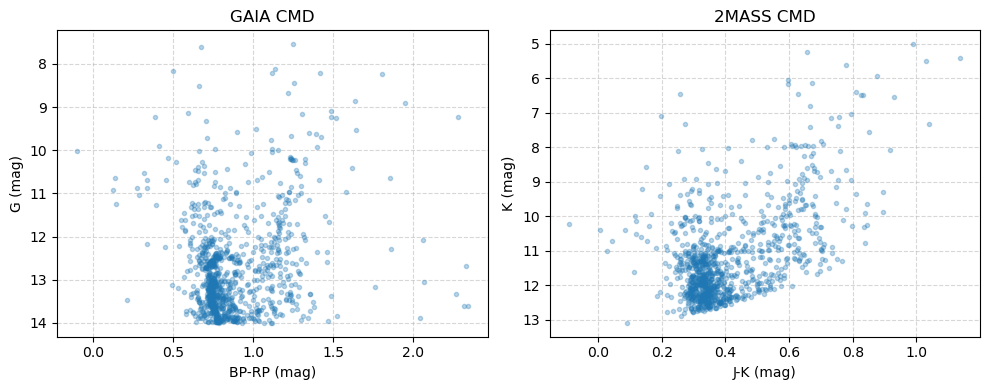

In [10]:
fig, axs = plt.subplots(1,2,figsize=(10,4))

# Plotting GAIA colour-mag diagram
ax=axs[0]
X=data['bp_rp']
Y=data['phot_g_mean_mag']
ax.plot(X,Y,'.',alpha=.3)

ax.grid(linestyle="--",alpha=.5)
ax.invert_yaxis()

# do labeling
ax.set_xlabel(f"BP-RP (mag)")
ax.set_ylabel(f"G (mag)")
ax.set_title(f"GAIA CMD")

# Plotting 2MASS colour-mag diagram
ax=axs[1]
X=data['j_m']-data['ks_m'] # J-Ks
Y=data['ks_m']
ax.plot(X,Y,'.',alpha=.3)

ax.grid(linestyle="--",alpha=.5)
ax.invert_yaxis()

# do labeling
ax.set_xlabel(f"J-K (mag)")
ax.set_ylabel(f"K (mag)")
ax.set_title(f"2MASS CMD")

plt.tight_layout()
plt.savefig("./figures/cmds M67.png",dpi=200,bbox_inches="tight")

#### Comments:
As there are 392 fibres on the 2dF Instrument and takes about 45 minutes to complete each observation, the current number of good stars (~1000) takes only about 2.5hrs to finish. 

> Based upon historical weather trends, about 33% of time is lost to bad weather. Proposers are therefore required to multiply their time requirement by a factor of 1.5 to allow for time lost to weather.

Then about 4 to 5 hrs should be proposed for the observation.